In [1]:
import os
os.environ["OPENAI_DEFAULT_MODEL"] = 'gpt-4o-mini'

In [2]:
!pip install yfinance matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

ticker = "NVDA"
df = yf.download(ticker, start="2024-05-01", end="2024-05-26")

/tmp/ipykernel_73864/1393723561.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2024-05-01", end="2024-05-26")
[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-05-01,83.007950,85.965772,81.222658,85.043143,559863000
2024-05-02,85.782852,86.202683,83.166889,84.415393,377898000
2024-05-03,88.753670,89.245471,87.005365,87.754068,398341000
2024-05-06,92.103340,92.183310,89.019568,89.354434,376203000
2024-05-07,90.517967,91.744476,88.975582,91.061749,437342000


In [5]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-05-20,94.742287,95.162118,93.402824,93.712698,318764000
2024-05-21,95.348045,95.362040,93.142922,93.561754,328946000
2024-05-22,94.912216,95.981790,93.211897,95.421016,548648000
2024-05-23,103.757698,106.277691,101.479598,101.987399,835065000
2024-05-24,106.426628,106.432622,102.959007,104.407428,429494000


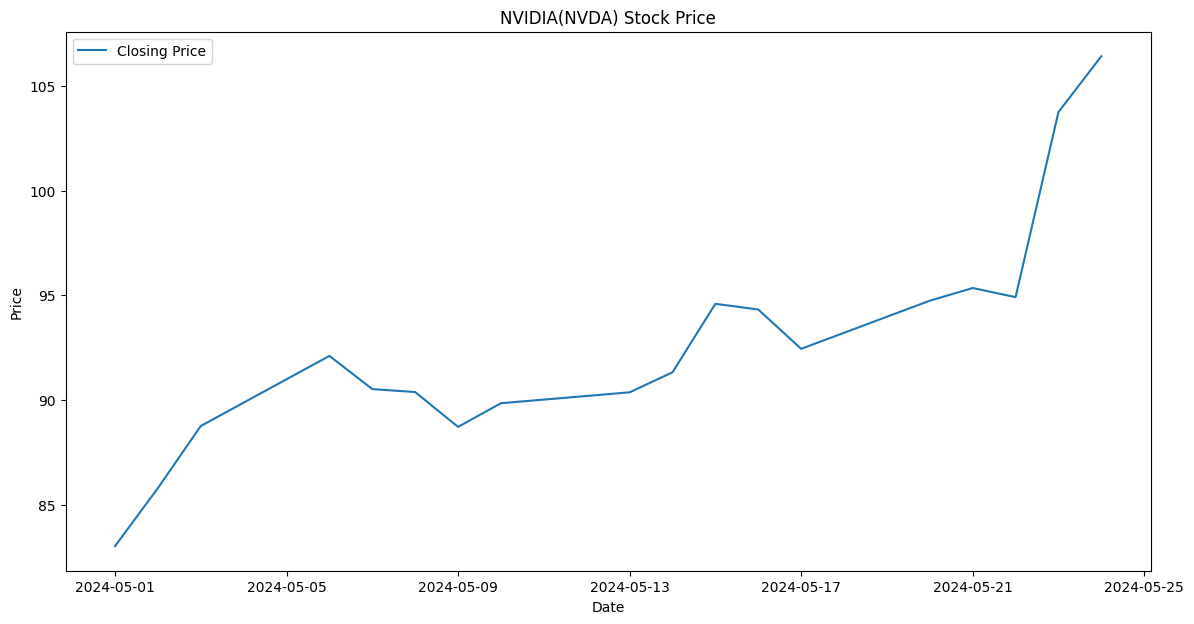

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Closing Price')
plt.title('NVIDIA(NVDA) Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [7]:
df.rename(columns={
    'Open': '시가',
    'High': '고가',
    'Low': '저가',
    'Close': '종가',
    'Adj Close': '수정 종가',
    'Volume': '거래량'
}, inplace=True)

df.rename_axis('날짜', inplace=True)

In [8]:
df.head()

Price,종가,고가,저가,시가,거래량
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
날짜,,,,,
2024-05-01,83.007950,85.965772,81.222658,85.043143,559863000
2024-05-02,85.782852,86.202683,83.166889,84.415393,377898000
2024-05-03,88.753670,89.245471,87.005365,87.754068,398341000
2024-05-06,92.103340,92.183310,89.019568,89.354434,376203000
2024-05-07,90.517967,91.744476,88.975582,91.061749,437342000


In [9]:
from io import StringIO
csv_buffer = StringIO()
df.to_csv(csv_buffer)

csv_data = csv_buffer.getvalue()
print(csv_data)

Price,종가,고가,저가,시가,거래량
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
날짜,,,,,
2024-05-01,83.00794982910156,85.96577177323404,81.22265755025684,85.04314260728708,559863000
2024-05-02,85.78285217285156,86.20268321187375,83.16688916320159,84.41539269757547,377898000
2024-05-03,88.75366973876953,89.24547072408387,87.00536516764065,87.75406766785412,398341000
2024-05-06,92.10334014892578,92.1833101500868,89.0195684762701,89.35443427647793,376203000
2024-05-07,90.5179672241211,91.7444763476329,88.97558195332661,91.06174947211589,437342000
2024-05-08,90.37601470947266,91.15770112152674,89.38440517522886,89.44738363715732,325721000
2024-05-09,88.71168518066406,91.03575690690285,88.19589167973308,90.49297372342349,378013000
2024-05-10,89.84223175048828,91.36462830200051,89.19148983724465,90.26906377983879,335325000
2024-05-13,90.363037109375,90.9617978228875,88.49377833765243,90.44200043253207,289680000
2024-05-14,91.31965637207031,91.61453717454157,88.89861527885883,89.56335162049751,296507000
2024-05-15,94.5

In [10]:
!pip install openai

Defaulting to user installation because normal site-packages is not writeable


In [11]:
import os
import openai

openai.api_key = os.getenv("OPENAI_API_KEY")

response = openai.chat.completions.create(
  model=os.getenv("OPENAI_DEFAULT_MODEL"),
  messages=[
    {
      "role": "system",
      "content": "다음은 엔비디아의 날짜별 주가 데이터야. 이 데이터를 분석해서 보고해줘."
    },
    {
      "role": "user",
      "content": csv_data
    }
  ],
  temperature=0,
  max_tokens=1024,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

print(response.choices[0].message.content)

엔비디아(NVDA)의 2024년 5월 주가 데이터를 분석한 결과는 다음과 같습니다.

### 1. 주가 동향
- **시작가**: 2024년 5월 1일의 종가는 약 83.01달러로 시작했습니다.
- **최고가**: 5월 23일에 103.76달러로 최고가를 기록했습니다.
- **최저가**: 5월 1일에 81.22달러로 최저가를 기록했습니다.
- **종가**: 5월 24일의 종가는 106.43달러로, 한 달 동안 주가는 상승세를 보였습니다.

### 2. 주가 변화
- **변화폭**: 5월 1일부터 5월 24일까지의 종가는 83.01달러에서 106.43달러로, 약 28.2% 상승했습니다.
- **일일 변동성**: 주가는 일일로 보면 큰 변동성을 보였으며, 특히 5월 23일에 큰 폭으로 상승했습니다.

### 3. 거래량
- **거래량**: 5월 23일에는 835,065,000주가 거래되어 가장 높은 거래량을 기록했습니다. 이는 주가 상승과 관련이 있을 수 있습니다.
- **거래량 추세**: 전반적으로 거래량은 5월 초반에 비해 중반 이후에 증가하는 경향을 보였습니다.

### 4. 주요 일자
- **5월 15일**: 94.59달러로 종가가 상승하며, 주가가 90달러를 넘어섰습니다.
- **5월 23일**: 주가가 103.76달러로 급등하며, 이 날의 거래량이 가장 많았습니다.

### 5. 결론
엔비디아의 2024년 5월 주가는 전반적으로 상승세를 보였으며, 특히 중반 이후에 급격한 상승이 있었습니다. 거래량 또한 증가하며 투자자들의 관심이 높아진 것으로 보입니다. 이러한 추세는 향후 주가에 긍정적인 영향을 미칠 가능성이 있습니다. 

이 데이터는 주식 투자 결정을 내리는 데 참고할 수 있으며, 추가적인 시장 동향이나 기업 실적 발표와 같은 외부 요인도 고려해야 합니다.
